In [2]:
import pandas as pd
data = pd.read_json('/workspaces/tarot/archive 2/tarot-images.json')
df = pd.json_normalize(data['cards'])
df.head()

,name,number,arcana,suit,img,fortune_telling,keywords,Archetype,Hebrew Alphabet,Numerology,Elemental,Mythical/Spiritual,Questions to Ask,meanings.light,meanings.shadow,Astrology,Affirmation
0,The Fool,0,Major Arcana,Trump,m00.jpg,"[Watch for new projects and new beginnings, Pr...","[freedom, faith, inexperience, innocence]",The Divine Madman,Aleph/Ox/1,0 (off the scale; pure potential),Air,Adam before the fall. Christ as a wandering ho...,[What would I do if I felt free to take a leap...,"[Freeing yourself from limitation, Expressing ...","[Being gullible and naive, Taking unnecessary ...",NaN,NaN
1,The Magician,1,Major Arcana,Trump,m01.jpg,"[A powerful man may play a role in your day, Y...","[capability, empowerment, activity]",The Ego/The Self,Beth/House/2,"1 (origins, unity, seeds)",The Sun/Mercury,"Thoth, the Egyptian god of wisdom, known to th...","[What am I empowered to do?, How might my abil...","[Taking appropriate action, Receiving guidance...","[Inflating your own ego, Abusing talents, Mani...",NaN,NaN
2,The High Priestess,2,Major Arcana,Trump,m02.jpg,"[A mysterious woman arrives, A sexual secret m...","[intuition, reflection, purity, initiation]",The Virgin/The Maiden,Gimel/Camel/3,"2 (division, debate, duality)",The Moon,"The feminine aspect of divinity, particularity...","[What might a rebel against tradition do?, Wha...","[Listening to your feelings and intuitions, Ex...","[Being aloof, Obsessing on secrets and conspir...",NaN,NaN
3,The Empress,3,Major Arcana,Trump,m03.jpg,"[Pregnancy is in the cards, An opportunity to ...","[fertility, productivity, ripeness, nurturing]",The Mother,Daleth/Door/4,"3 (expression, productivity, output)",Venus,"Gaia, Mother Earth, Ishtar, DemeterÑmature, re...",[What would a concerned and capable mother do?...,"[Nurturing yourself and others, Bearing fruit,...","[Overindulging, Being greedy, Smothering someo...",NaN,NaN
4,The Emperor,4,Major Arcana,Trump,m04.jpg,"[A father figure arrives, A new employer or au...","[authority, regulation, direction, structure]",The Father,"He[as]/Window/5, or in some decks, Tzaddi/Fish...","4 (stability, equality, persistence)",Mars/Aries,"Masculine gods, including the Hebrew God, the ...",[How does the issue of control or regulation i...,"[Exercising authority, Defining limits, Direct...","[Micromanaging, Crushing the creativity of oth...",NaN,NaN


In [3]:
df['fortune_telling_1'] = df['fortune_telling'].str[0]
df['fortune_telling_2'] = df['fortune_telling'].str[1]
df['fortune_telling_3'] = df['fortune_telling'].str[2]

In [4]:
# Learn infomation about the selected card
#import plt

import matplotlib.pyplot as plt
import PIL

def tarot_information(dataframe, card_num):
    
    # identify images
    name_img = dataframe['img'].iloc[card_num]
    # open images
    img = PIL.Image.open(f'/workspaces/tarot/archive 2/cards/{name_img}')
    
    print('All the info you need for the {} card:'.format(dataframe['name'].iloc[card_num]))
    print('')
    
    plt.figure()
    plt.title(dataframe['name'].iloc[card_num])
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    print('Number: ')
    print(dataframe['number'].iloc[card_num])
    print('')
    print('Arcana: ')
    print(dataframe['arcana'].iloc[card_num])
    print('')
    print('Suit: ')
    print(dataframe['suit'].iloc[card_num])
    print('')
    print('Numerology: ')
    print(dataframe['Numerology'].iloc[card_num])
    print('')
    print('Element: ')
    print(dataframe['Elemental'].iloc[card_num])
    print('') 
    if df.Astrology.notna().iloc[card_num] == True:
        print('Astrology')
        print(dataframe['Astrology'].iloc[card_num])
        print('')
    if df.Affirmation.notna().iloc[card_num] == True:
        print('Affirmation')
        print(dataframe['Affirmation'].iloc[card_num])

In [5]:
# make the df into csv
df.to_csv('tarot.csv')

All the info you need for the The Fool card:



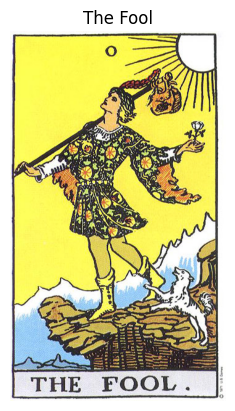

Number: 
0

Arcana: 
Major Arcana

Suit: 
Trump

Numerology: 
0 (off the scale; pure potential)

Element: 
Air



In [6]:
tarot_information(df, 0)

In [7]:
import datetime

def tarot_reading(dataframe):

    reading = dataframe.sample(n = 3).reset_index(drop=True)    
    today = datetime.date.today()
    date = today.strftime("%d-%B-%Y")
    
    # identify images
    name_img_past = reading['img'].iloc[0]
    name_img_present = reading['img'].iloc[1]
    name_img_future = reading['img'].iloc[2]

    # open images
    img_past = PIL.Image.open(f'/workspaces/tarot/archive 2/cards/{name_img_past}')
    img_present = PIL.Image.open(f'/workspaces/tarot/archive 2/cards/{name_img_present}')
    img_future = PIL.Image.open(f'/workspaces/tarot/archive 2/cards/{name_img_future}')
    # plot images
    fig, (past, present, future) = plt.subplots(1, 3, figsize=(10,5.5))
    fig.suptitle('Your reading: Past, Present, Future on {}'.format(date))
    past.imshow(img_past)
    past.axis('off')
    past.set_title(reading['name'].iloc[0])
    present.imshow(img_present)
    present.axis('off')
    present.set_title(reading['name'].iloc[1])
    future.imshow(img_future)
    future.axis('off')
    future.set_title(reading['name'].iloc[2])
    plt.show()

    # Outcomes
    print('My dearest, your fortune reading is about your past, present and future.')
    print('')
    print('Regarding your past: ')
    print(reading['fortune_telling_1'].iloc[0])
    print(reading['fortune_telling_2'].iloc[0])
    print(reading['fortune_telling_3'].iloc[0])
    print('')
    print('Regarding your present: ')
    print(reading['fortune_telling_1'].iloc[1])
    print(reading['fortune_telling_2'].iloc[1])
    print(reading['fortune_telling_3'].iloc[1])
    print('')
    print('Regarding your future: ')
    print(reading['fortune_telling_1'].iloc[2])
    print(reading['fortune_telling_2'].iloc[2])
    print(reading['fortune_telling_3'].iloc[2])

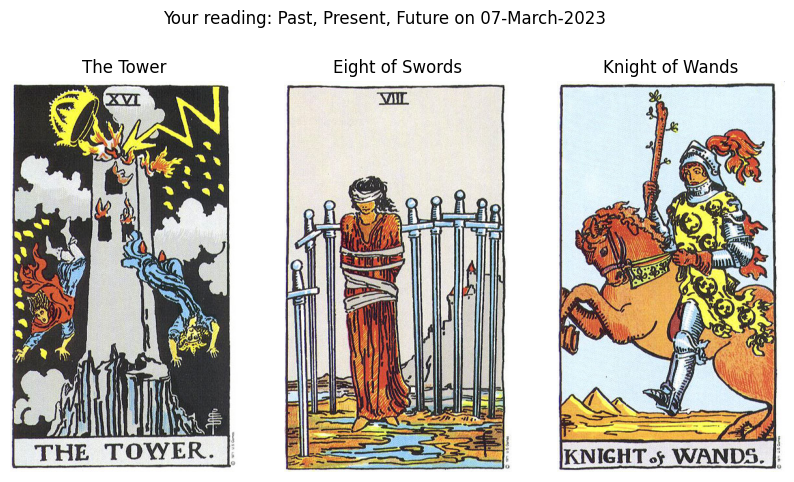

My dearest, your fortune reading is about your past, present and future.

Regarding your past: 
Impending disaster
Cancel plans and reverse decisions
Someone wants to take you down a notch or two

Regarding your present: 
Get over playing the victim
Once you realize you are your own biggest obstacle, nothing can hold you back
nan

Regarding your future: 
This card represents a man with a bold, passionate personality, likely born between July 12th and August 11th, who wants to sweep you off your feet
nan
nan


In [8]:
tarot_reading(df)